PART 1

In [2]:
!pip install clean-text
!pip install --user -U nltk


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\welin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\welin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import re
import cleantext
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('news_sample.csv')
# define regular expressions for cleaning
num_re = re.compile(r"\d+")
# Formatting dates with YYYY-MM-DD since that's how it's formatted in the columns of the data.
date_re = re.compile(r"\d{4}-\d{2}-\d{2}")
email_re = re.compile(r"\S+@\S+")
url_re = re.compile(r"https?://\S+")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenlist = []
stopwordlist = []
stemmedlist = []
vocabulary_size = []
filtered_vocabulary_size = []
stemmed_vocabulary_size = []
def clean_text(text):
    # lower case all words
    text = text.lower()
    # replace multiple white spaces, tabs, or new lines with a single space
    text = re.sub(r"\s+", " ", text)
    # replace numbers, dates, emails, and URLs with special tokens
    text = date_re.sub("<DATE>", text)
    text = email_re.sub("<EMAIL>", text)
    text = url_re.sub("<URL>", text)
    text = num_re.sub("<NUM>", text)
    tokens = word_tokenize(text)
    # Removing tokens that come from tags
    tags = ['<','>','num','date','email','url']
    filtered_tokens = []
    for token in tokens:
        if token.lower() not in tags and re.match(r'^\w', token):
            filtered_tokens.append(token)
    # Removing stopwords
    tokenlist.append(filtered_tokens)
    stopwordless_tokens = []
    for token in filtered_tokens:
        if token.lower() not in stop_words:
            stopwordless_tokens.append(token)
    stopwordlist.append(stopwordless_tokens)
    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwordless_tokens]
    stemmedlist.append(stemmed_tokens)
    # Compute vocabulary size before and after removing stopwords and stemming
    vocabulary_size.append(len(set(filtered_tokens)))
    filtered_vocabulary_size.append(len(set(stopwordless_tokens)))
    stemmed_vocabulary_size.append(len(set(stemmed_tokens)))
    stemmedtext = ' '.join(stemmed_tokens)
    return (stemmedtext)


df['content'] = df['content'].apply(clean_text)
vocab_sum = sum(vocabulary_size)
filtered_sum= sum(filtered_vocabulary_size)
stemmed_sum = sum(stemmed_vocabulary_size)
print("Vocabulary size:", vocab_sum ) 
print("Vocabulary size without stopwords:",  filtered_sum, ", resulting in reduction rate:", filtered_sum/vocab_sum)
print("Vocabulary size after stemming with no stopwords:", stemmed_sum, ", resulting in reduction rate:", stemmed_sum/filtered_sum)

print(df)


Vocabulary size: 72230
Vocabulary size without stopwords: 59307 , resulting in reduction rate: 0.8210854215699848
Vocabulary size after stemming with no stopwords: 53917 , resulting in reduction rate: 0.9091169676429427
     Unnamed: 0     id                domain        type  \
0             0    141               awm.com  unreliable   
1             1    256     beforeitsnews.com        fake   
2             2    700           cnnnext.com  unreliable   
3             3    768               awm.com  unreliable   
4             4    791  bipartisanreport.com   clickbait   
..          ...    ...                   ...         ...   
245         245  39259     beforeitsnews.com        fake   
246         246  39468     beforeitsnews.com        fake   
247         247  39477       www.newsmax.com         NaN   
248         248  39550       www.newsmax.com         NaN   
249         249  39558       www.newsmax.com         NaN   

                                                   url  \
0

PART 1.1

In [5]:
with open("news_sample.csv","r") as file:
    data = file.read()

# define regular expressions for cleaning
num_re = re.compile(r"\d+")
# Formatting dates with YYYY-MM-DD since that's how it's formatted in the columns of the data.
date_re = re.compile(r"\d{4}-\d{2}-\d{2}")
email_re = re.compile(r"\S+@\S+")
url_re = re.compile(r"https?://\S+")

def clean_text(text):
    # lower case all words
    text = text.lower()
    # replace multiple white spaces, tabs, or new lines with a single space
    text = re.sub(r"\s+", " ", text)
    # replace numbers, dates, emails, and URLs with special tokens
    text = date_re.sub("<DATE>", text)
    text = email_re.sub("<EMAIL>", text)
    text = url_re.sub("<URL>", text)
    text = num_re.sub("<NUM>", text)
    return text

# Using module to clean data(Note they don't have a date setting so that is done manually):

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
processed_data=clean_text(data)
content_re = re.compile(r'<URL>(.*?)\s*,<DATE>\s*<NUM>:<NUM>:<NUM>')
content = re.findall(content_re, processed_data)
num_texts = len(content)
max_words = max(len(word_tokenize(texts)) for texts in content)
word_array = np.zeros((num_texts, max_words), dtype=object)
tokenlist = []
stopwordlist = []
stemmedlist = []
vocabulary_size= []
filtered_vocabulary_size= []
stemmed_vocabulary_size= []
for i, texts in enumerate(content):
    # Tokenize the text
    tokens = word_tokenize(texts)

    # Removing tokens that come from tags
    tags = ['<','>','num','date','email','url']
    filtered_tokens = []
    for token in tokens:
        if token.lower() not in tags and re.match(r'^\w', token):
            filtered_tokens.append(token)
    # Removing stopwords
    tokenlist.append(filtered_tokens)
    stopwordless_tokens = []
    for token in filtered_tokens:
        if token.lower() not in stop_words:
            stopwordless_tokens.append(token)
    stopwordlist.append(stopwordless_tokens)
    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwordless_tokens]
    stemmedlist.append(stemmed_tokens)
    # Compute vocabulary size before and after removing stopwords and stemming
    vocabulary_size.append(len(set(filtered_tokens)))
    filtered_vocabulary_size.append(len(set(stopwordless_tokens)))
    stemmed_vocabulary_size.append(len(set(stemmed_tokens)))

    for j, token in enumerate(stemmed_tokens):
        word_array[i, j] = token
#Making a 1d array where each entry is a stopwordless and stemmed article
content_arr = []
for art in word_array:
  content_arr.append(' '.join(art[art!= 0]))
# 2D ARRAY OF CONTENT
vocab_sum = sum(vocabulary_size)
filtered_sum= sum(filtered_vocabulary_size)
stemmed_sum = sum(stemmed_vocabulary_size)
print("Vocabulary size:", vocab_sum ) 
print("Vocabulary size without stopwords:",  filtered_sum, ", resulting in reduction rate:", filtered_sum/vocab_sum)
print("Vocabulary size after stemming with no stopwords:", stemmed_sum, ", resulting in reduction rate:", stemmed_sum/filtered_sum)
print("2d array of content:",content_arr)


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 3457: character maps to <undefined>

PART 1.2


In [ ]:
# Ids
id_re = re.compile(r'\n\d+,(\d+),[^,]+,')
ids= re.findall(id_re,data)
# Sources and type (missing one for some reason)
source_re =  re.compile(r'<NUM>,<NUM>,([<NUM>A-Za-z].*?)\.[A-Za-z]+,(.*?),')
sources = re.findall(source_re,processed_data)

pdata = {
    'id': ids,
    'source:': [x[0] for x in sources],
    'Type:': [x[1] for x in sources],
    'Content:': content_arr,
    'Stemmed Words:': stemmed_vocabulary_size 
}
df = pd.DataFrame(pdata)
print(df)

        id           source:       Type:  \
0      141               awm  unreliable   
1      256     beforeitsnews        fake   
2      700           cnnnext  unreliable   
3      768               awm  unreliable   
4      791  bipartisanreport   clickbait   
..     ...               ...         ...   
245  39259     beforeitsnews        fake   
246  39468     beforeitsnews        fake   
247  39477       www.newsmax               
248  39550       www.newsmax               
249  39558       www.newsmax               

                                              Content:  Stemmed Words:  
0    power christma make wild wonder thing need bel...             152  
1    strand dna reconnect movi reader think stori f...              74  
2    hike alon friday th fan film usa min fan tribu...             212  
3    rare shark caught scientist left blunder answe...             174  
4    trump unnerv abil abil creat realiti convinc m...             106  
..                               

In [ ]:
newsmax = df['Type:'] == ''
print("Every dataframe entry with no type:")
print(df[newsmax])

newsmax = df['source:'] == 'www.newsmax'
print("Every dataframe entry from newsmax:")
print(df[newsmax])

willyloman = df['source:'] == 'willyloman.wordpress'
print("Every dataframe entry from willyloman.wordpress:")
print(df[willyloman])

willstreetonparade = df['source:'] == 'wallstreetonparade'
print("Every dataframe entry from willstreetonparade:")
print(df[willstreetonparade])

Every dataframe entry with no type:
        id               source: Type:  Stemmed Words:
103  17604  willyloman.wordpress                   168
105  18225  willyloman.wordpress                    91
116  19866  willyloman.wordpress                   629
121  20411  willyloman.wordpress                    36
228  37134    wallstreetonparade                   408
238  38549           www.newsmax                    39
240  38616           www.newsmax                   148
241  38652           www.newsmax                    79
242  38736           www.newsmax                   112
247  39477           www.newsmax                    89
248  39550           www.newsmax                   170
249  39558           www.newsmax                    52
Every dataframe entry from newsmax:
        id      source: Type:  Stemmed Words:
238  38549  www.newsmax                    39
240  38616  www.newsmax                   148
241  38652  www.newsmax                    79
242  38736  www.newsmax      

In [ ]:
# calculate average value of column 'A' and count of rows for each unique value in column 'B'
stats_df = df.groupby('Type:').agg({'Stemmed Words:': 'mean', 'Type:': 'size'})
stats_df.rename(columns={'Stemmed Words:': 'Avg', 'Type:': 'Count'}, inplace=True)
# rename columns
print(stats_df)

                   Avg  Count
Type:                        
            168.416667     12
bias        171.000000      6
clickbait   106.000000      1
conspiracy  290.354839     31
fake        204.632258    155
hate         30.000000      1
junksci     138.166667      6
political   207.043478     23
reliable    158.666667      3
unknown     530.833333      6
unreliable  115.666667      6


Observations: 

  1.All articles from www.newsmax.com, willyloman.wordpress and wallstreetonparade.com do not have a type.

2. The ids go up with the article order

3. The average amount of stemmed words change with each type, this is however a small sample size for a lot of the types.

4. The count of types vary a lot, 62% are "fake", yet only 1/250 is "clickbait" or "hate".

5. The words a more evenly spread without stopwords (see graphs below)


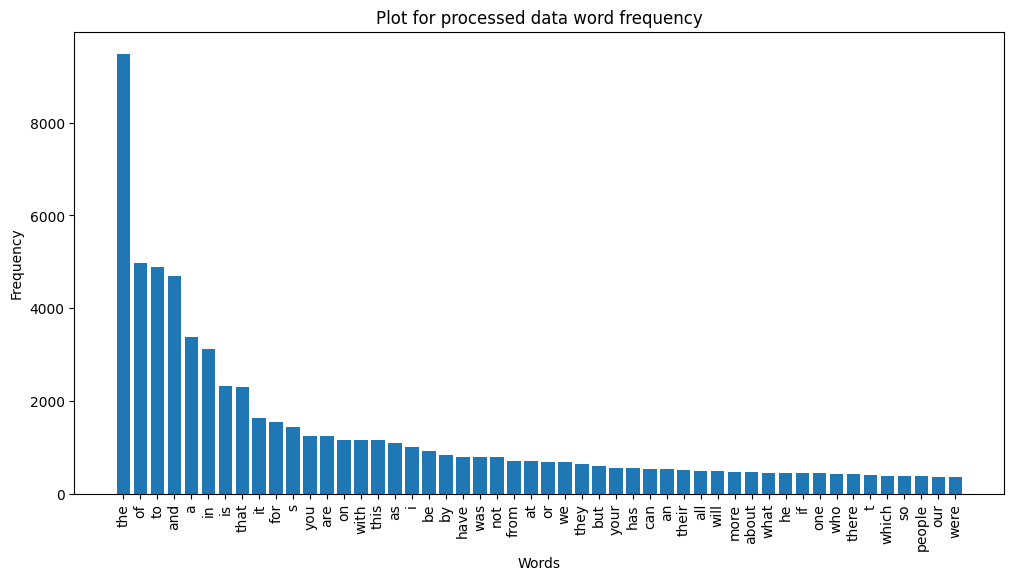

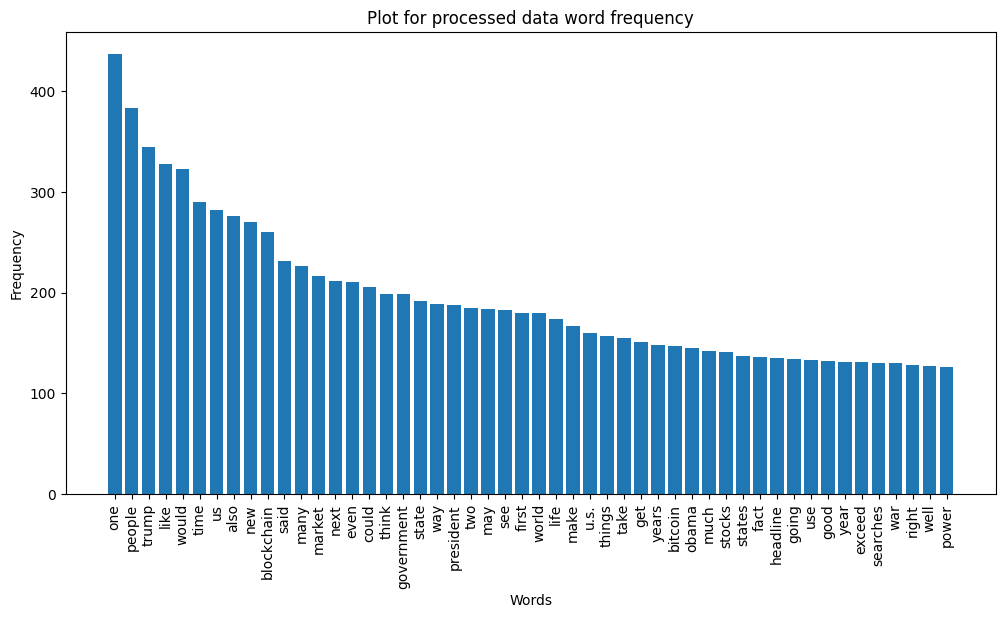

In [6]:

from collections import Counter
import matplotlib.pyplot as plt
# Use Counter to count the frequency of each word
word_counts = Counter(sum(tokenlist, []))

# Get the 50 most common words
top_words = word_counts.most_common(50)

# Separate out the words and their counts
word_labels = [word[0] for word in top_words]
word_freqs = [word[1] for word in top_words]

# Plot a bar chart of the top 50 words
plt.figure(figsize=(12, 6))
plt.title('Plot for processed data word frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(word_labels, word_freqs)
plt.xticks(rotation=90)
plt.show()


word_counts = Counter(sum(stopwordlist, []))
top_words = word_counts.most_common(50)

# Separate out the words and their counts
word_labels = [word[0] for word in top_words]
word_freqs = [word[1] for word in top_words]

# Plot a bar chart of the top 50 words
plt.figure(figsize=(12, 6))
plt.title('Plot for processed data word frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(word_labels, word_freqs)
plt.xticks(rotation=90)
plt.show()

PART 1.3

In [9]:

df = pd.read_csv('news_cleaned_2018_02_13.csv',nrows=50000)
# define regular expressions for cleaning
num_re = re.compile(r"\d+")
# Formatting dates with YYYY-MM-DD since that's how it's formatted in the columns of the data.
date_re = re.compile(r"\d{4}-\d{2}-\d{2}")
email_re = re.compile(r"\S+@\S+")
url_re = re.compile(r"https?://\S+")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenlist = []
stopwordlist = []
stemmedlist = []
vocabulary_size = []
filtered_vocabulary_size = []
stemmed_vocabulary_size = []
def clean_text(text):
    # lower case all words
    text = text.lower()
    # replace multiple white spaces, tabs, or new lines with a single space
    text = re.sub(r"\s+", " ", text)
    # replace numbers, dates, emails, and URLs with special tokens
    text = date_re.sub("<DATE>", text)
    text = email_re.sub("<EMAIL>", text)
    text = url_re.sub("<URL>", text)
    text = num_re.sub("<NUM>", text)
    tokens = word_tokenize(text)
    # Removing tokens that come from tags
    tags = ['<','>','num','date','email','url']
    filtered_tokens = []
    for token in tokens:
        if token.lower() not in tags and re.match(r'^\w', token):
            filtered_tokens.append(token)
    # Removing stopwords
    tokenlist.append(filtered_tokens)
    stopwordless_tokens = []
    for token in filtered_tokens:
        if token.lower() not in stop_words:
            stopwordless_tokens.append(token)
    stopwordlist.append(stopwordless_tokens)
    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwordless_tokens]
    stemmedlist.append(stemmed_tokens)
    # Compute vocabulary size before and after removing stopwords and stemming
    vocabulary_size.append(len(set(filtered_tokens)))
    filtered_vocabulary_size.append(len(set(stopwordless_tokens)))
    stemmed_vocabulary_size.append(len(set(stemmed_tokens)))
    stemmedtext = ' '.join(stemmed_tokens)
    return (stemmedtext)


df['content'] = df['content'].apply(clean_text)
vocab_sum = sum(vocabulary_size)
filtered_sum= sum(filtered_vocabulary_size)
stemmed_sum = sum(stemmed_vocabulary_size)
print("Vocabulary size:", vocab_sum ) 
print("Vocabulary size without stopwords:",  filtered_sum, ", resulting in reduction rate:", filtered_sum/vocab_sum)
print("Vocabulary size after stemming with no stopwords:", stemmed_sum, ", resulting in reduction rate:", stemmed_sum/filtered_sum)

print(df)


Vocabulary size: 13673147
Vocabulary size without stopwords: 11159412 , resulting in reduction rate: 0.8161553444865326
Vocabulary size after stemming with no stopwords: 10244734 , resulting in reduction rate: 0.9180352871638756
       Unnamed: 0     id              domain       type  \
0               0      2       express.co.uk      rumor   
1               1      6  barenakedislam.com       hate   
2               2      7  barenakedislam.com       hate   
3               3      8  barenakedislam.com       hate   
4               4      9  barenakedislam.com       hate   
...           ...    ...                 ...        ...   
49995        9995  55279   beforeitsnews.com       fake   
49996        9996  55280   beforeitsnews.com       fake   
49997        9997  55281  weeklystandard.com  political   
49998        9998  55282       breitbart.com  political   
49999        9999  55283   beforeitsnews.com       fake   

                                                     url  \
0 

In [14]:
train_data, temp_data = train_test_split(df, test_size=0.2)

# Split the temporary data into validation and test sets (50/50 split)
valid_data, test_data = train_test_split(temp_data, test_size=0.5)


       Unnamed: 0     id               domain        type  \
6797         6797   7758  canadafreepress.com  conspiracy   
42822        2822  47873    beforeitsnews.com        fake   
23773        3773  26237    beforeitsnews.com        fake   
32547        2547  36832    beforeitsnews.com        fake   
365           365    429     beehivebugle.com      satire   
...           ...    ...                  ...         ...   
40581         581  45471    beforeitsnews.com        fake   
33203        3203  37539     city-journal.org   political   
27541        7541  30203    beforeitsnews.com        fake   
6552         6552   7500    beforeitsnews.com        fake   
15021        5021  17072    beforeitsnews.com        fake   

                                                     url  \
6797   http://canadafreepress.com/article/obama-era-p...   
42822  http://beforeitsnews.com/alternative/2016/11/a...   
23773  http://beforeitsnews.com/survival/2015/05/cong...   
32547  http://beforeitsnews